In [2]:
import nmfspalettepy
print(nmfspalettepy.list_nmfs_palettes())

['oceans', 'waves', 'seagrass', 'urchin', 'crustacean', 'coral']


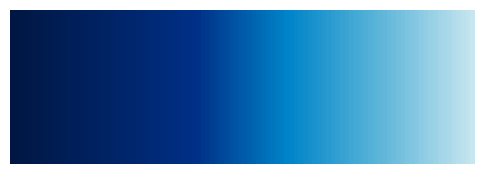

In [1]:
from nmfspalettepy import display_color_gradient, get_palette_colors

# Display the 'oceans' palette gradient
display_color_gradient(get_palette_colors("oceans"))

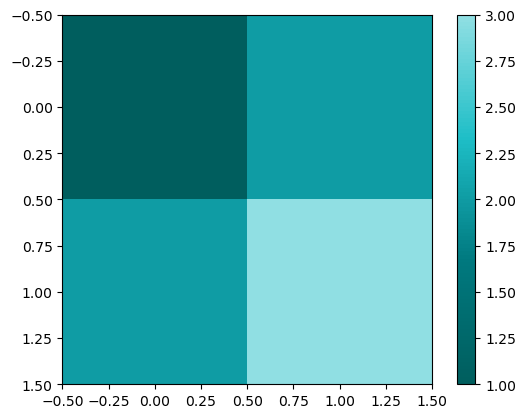

In [3]:
import matplotlib.pyplot as plt
from nmfspalettepy import create_nmfs_colormap

# Create a custom colormap
cmap = create_nmfs_colormap("waves")

# Use the colormap in a plot
plt.imshow([[1,2],[2,3]], cmap=cmap)
plt.colorbar()
plt.show()

In [43]:
import matplotlib.pyplot as plt
from nmfspalettepy import create_nmfs_colormap

def save_plot_with_colormap(theme, filename):
    """Creates a plot using the specified theme colormap and saves it as a PNG."""
    # Create a custom colormap
    cmap = create_nmfs_colormap(theme)

    # Use the colormap in a plot
    plt.imshow([[1, 2], [2, 3]], cmap=cmap)
    plt.colorbar()

    # Save the plot as a PNG file
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Example usage
themes = ["oceans", "waves", "seagrass", "urchin", "crustacean", "coral"]
for theme in themes:
    save_plot_with_colormap(theme, f"{theme}_plot.png")


In [4]:
from nmfspalettepy import get_palette_colors

# Get hex codes for the 'waves' palette
colors_hex = get_palette_colors("waves")
print("Hex codes for 'waves':", colors_hex)


Hex codes for 'waves': ['#005E5E', '#00797F', '#1EBEC7', '#90DFE3']


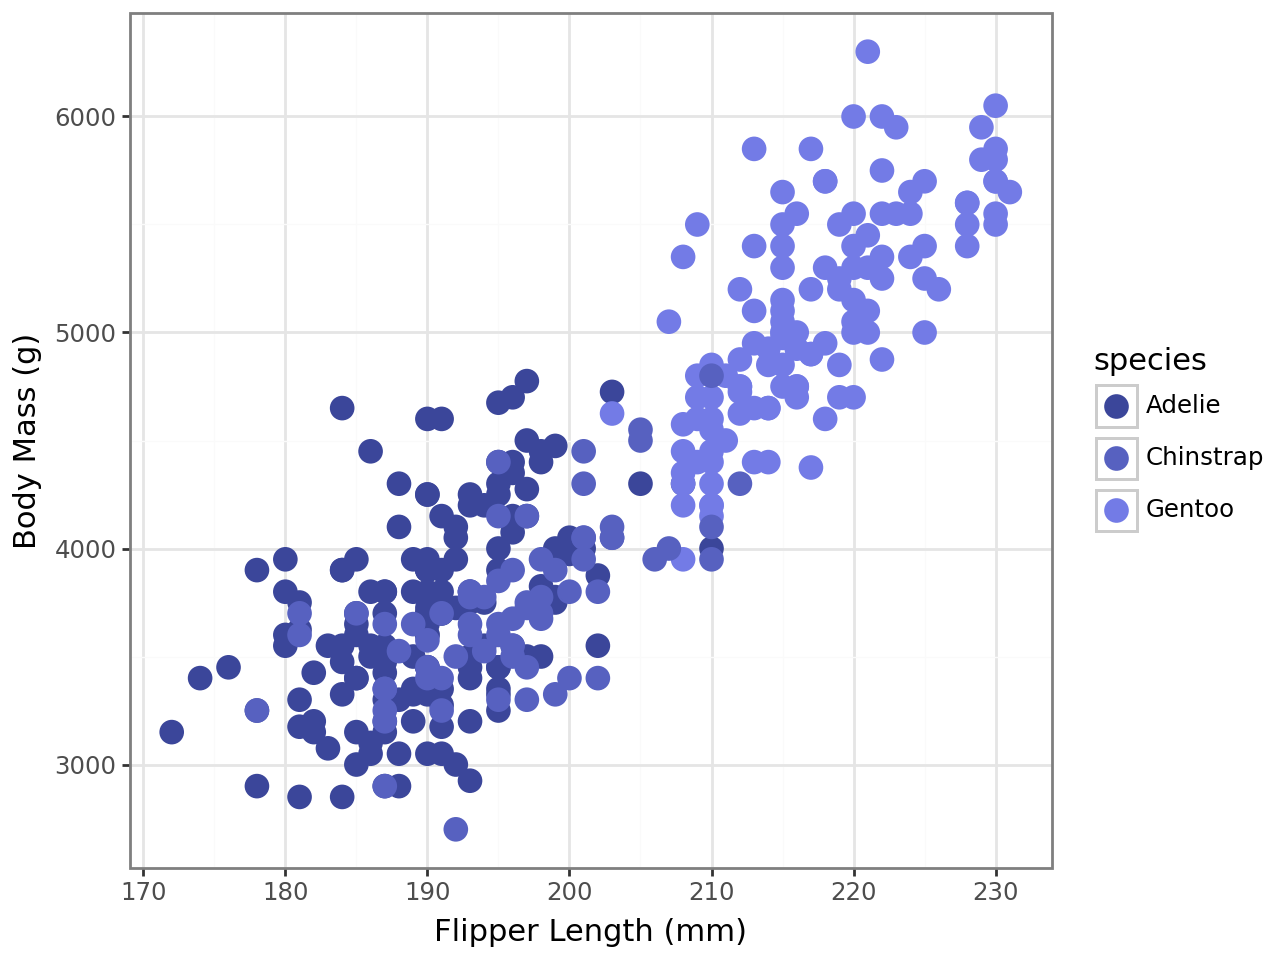

In [7]:
from plotnine import ggplot, aes, geom_point, theme_bw, scale_color_manual, labs
from plotnine.data import penguins
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from nmfspalettepy import get_palette_colors
nmfs_palettes = {
    "oceans": ["#001743", "#002364", "#003087", "#0085CA", "#5EB6D9", "#C6E6F0"],
    "waves": ["#005E5E", "#00797F", "#1EBEC7", "#90DFE3"],
    "seagrass": ["#365E17", "#4B8320", "#76BC21", "#B1DC6B"],
    "urchin": ["#3B469A", "#5761C0", "#737BE6", "#A8B8FF"],
    "crustacean": ["#853B00", "#DB6015", "#FF8400", "#ffab38"],
    "coral": ["#901200", "#b71300", "#db2207", "#ff6c57"],
}

def display_palette(colors, n=100):
    """Generates a gradient based on a list of colors."""
    # Create a color map
    cmap = LinearSegmentedColormap.from_list("Custom", colors, N=n)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_axis_off()
    plt.show()

# Remove rows with missing values
penguins_clean = penguins.dropna()

# Define the plot
# inspired: 
# https://github.com/nmfs-fish-tools/nmfspalette/tree/main
# https://connect.fisheries.noaa.gov/colors/
p = (
    ggplot(penguins_clean, aes(x='flipper_length_mm', y='body_mass_g', color='species')) +
    geom_point(size=4) +
    labs(y="Body Mass (g)", x="Flipper Length (mm)") +
    theme_bw() +
    scale_color_manual(values=nmfs_palettes["urchin"])  # Use 'urchin' palette
)

# Show the plot
p.show()

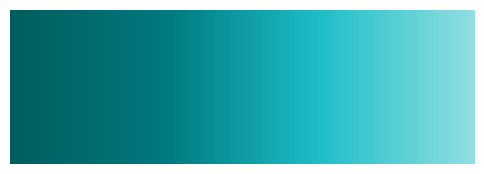

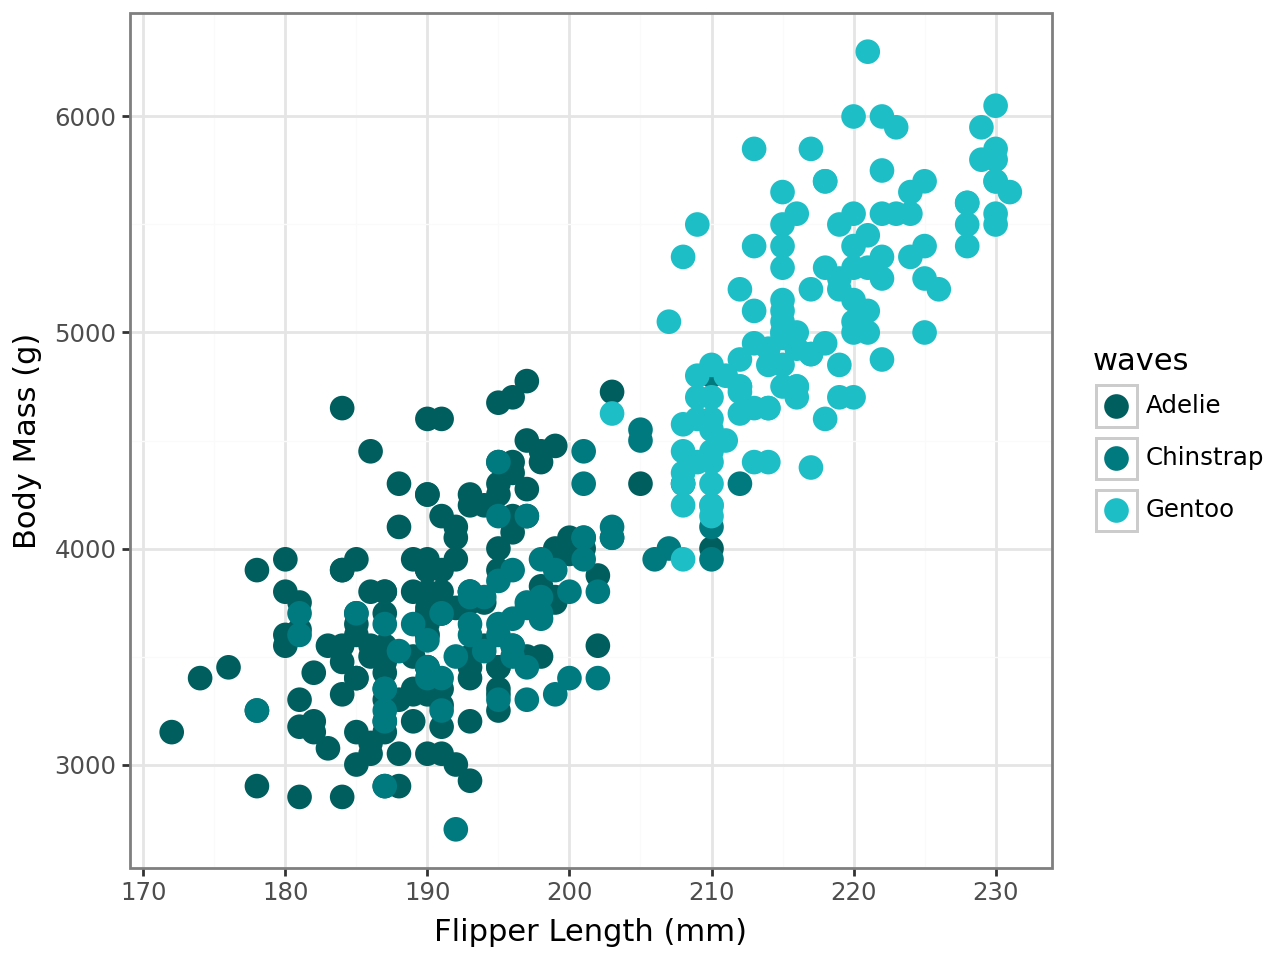

C:\Users\Michael.Akridge\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


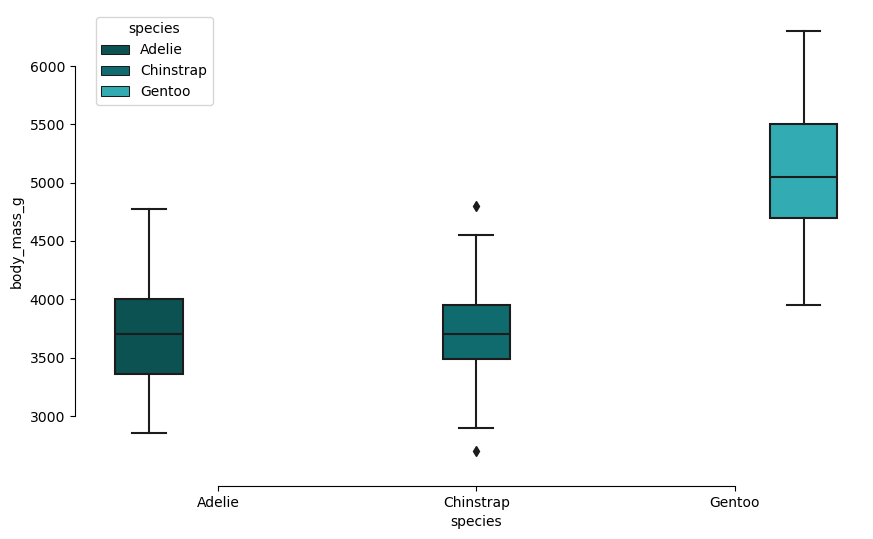

C:\Users\Michael.Akridge\AppData\Local\Temp\ipykernel_12980\3911668962.py:63: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
C:\Users\Michael.Akridge\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\Michael.Akridge\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\Michael.Akridge\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


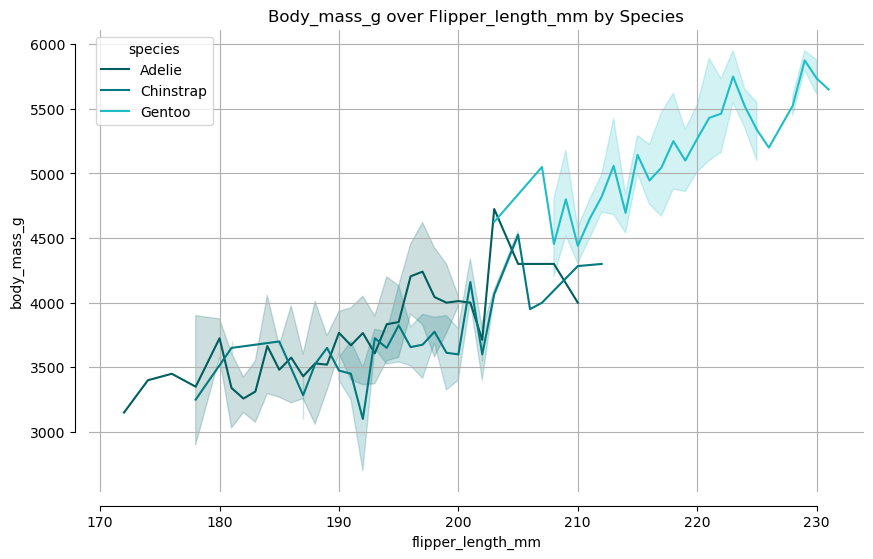

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from plotnine import ggplot, aes, geom_point, theme_bw, scale_color_cmap, labs
from nmfspalettepy import display_color_gradient, create_nmfs_colormap, get_palette_colors
import os
# Define the nmfs color palettes
nmfs_palettes = {
    "oceans": ["#001743", "#002364", "#003087", "#0085CA", "#5EB6D9", "#C6E6F0"],
    "waves": ["#005E5E", "#00797F", "#1EBEC7", "#90DFE3"],
    "seagrass": ["#365E17", "#4B8320", "#76BC21", "#B1DC6B"],
    "urchin": ["#3B469A", "#5761C0", "#737BE6", "#A8B8FF"],
    "crustacean": ["#853B00", "#DB6015", "#FF8400", "#ffab38"],
    "coral": ["#901200", "#b71300", "#db2207", "#ff6c57"],
}

def save_plot_as_png(plot, filename):
    plot.savefig(filename, format='png', bbox_inches='tight')
    st.image(filename)
    
# Function to display a gradient based on a list of colors
def display_palette(colors):
    display_color_gradient(colors)

# Function to display a palette and plot
def show_palette_and_plot(palette_name):
    if palette_name not in nmfs_palettes:
        print("Invalid palette name selected.")
        return
    
    colors = get_palette_colors(palette_name)
    display_palette(colors)
    
    # Load the penguins dataset
    penguins = sns.load_dataset("penguins")
    penguins_clean = penguins.dropna()
    
    palette = nmfs_palettes[palette_name]
    p = (
        ggplot(penguins_clean, aes(x='flipper_length_mm', y='body_mass_g', color='species')) +
        geom_point(size=4) +
        labs(y="Body Mass (g)", x="Flipper Length (mm)") +
        theme_bw() +
        scale_color_manual(name=palette_name, values=palette)  # Use manual colors
    )
    # Draw the plot
    p.show()


# Function to display a boxplot
def show_boxplot(data, x_var, y_var, hue_var, palette_name):
    palette = nmfs_palettes.get(palette_name, ["#555555"])  # Default grey if not found
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_var, y=y_var, hue=hue_var, palette=palette, data=data)
    sns.despine(offset=10, trim=True)
    plt.show()

# Function to display a line plot
def show_lineplot(data, x_var, y_var, hue_var, palette_name):
    palette = nmfs_palettes.get(palette_name, ["#555555"])  # Default grey if not found
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x_var, y=y_var, hue=hue_var, palette=palette, data=data)
    plt.title(f"{y_var.capitalize()} over {x_var.capitalize()} by {hue_var.capitalize()}")
    plt.grid(True)
    sns.despine(offset=10, trim=True)
    plt.show()

# Example usage
palette_name = "waves"
show_palette_and_plot(palette_name)
show_boxplot(penguins_clean, 'species', 'body_mass_g', 'species',palette_name)
show_lineplot(penguins_clean, 'flipper_length_mm', 'body_mass_g', 'species',palette_name)

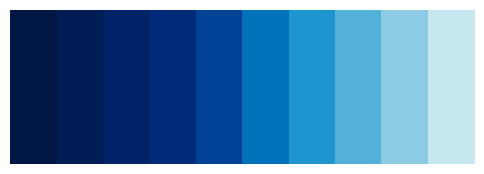

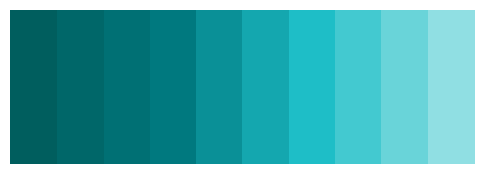

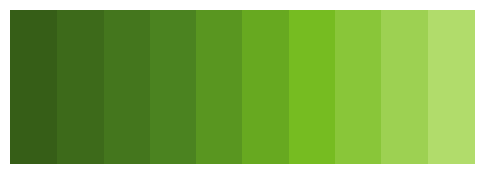

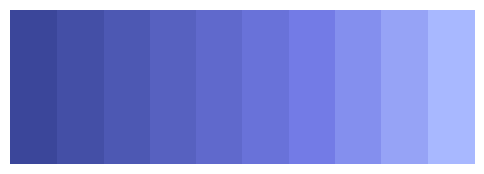

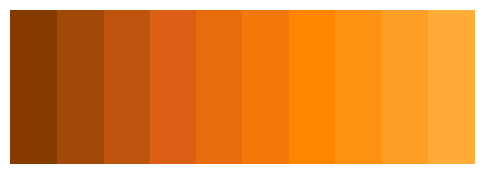

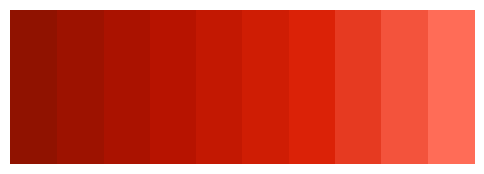

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define palettes grouped by themes
nmfs_palettes = {
    "oceans": ["#001743", "#002364", "#003087", "#0085CA", "#5EB6D9", "#C6E6F0"],
    "waves": ["#005E5E", "#00797F", "#1EBEC7", "#90DFE3"],
    "seagrass": ["#365E17", "#4B8320", "#76BC21", "#B1DC6B"],
    "urchin": ["#3B469A", "#5761C0", "#737BE6", "#A8B8FF"],
    "crustacean": ["#853B00", "#DB6015", "#FF8400", "#ffab38"],
    "coral": ["#901200", "#b71300", "#db2207", "#ff6c57"],
}

def display_palette(colors, n=100, filename=None):
    """Generates and displays a gradient based on a list of colors."""
    # Create a color map
    cmap = LinearSegmentedColormap.from_list("Custom", colors, N=n)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_axis_off()

    # Save the plot as a PNG file if filename is provided
    if filename:
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    else:
        plt.show()

def display_nmfs_palette(name, n, filename=None):
    """Displays the named palette with n interpolations."""
    if name in nmfs_palettes:
        display_palette(nmfs_palettes[name], n, filename)

# Example usage
for theme in ["oceans", "waves", "seagrass", "urchin", "crustacean", "coral"]:
    display_nmfs_palette(theme, 10, f"{theme}_palette.png")
